In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2, numpy as np

In [2]:
cat_image = mpimg.imread('cat.jpg')
monkey_image = mpimg.imread('test.jpg')

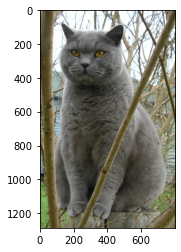

In [3]:
plt.imshow(cat_image)

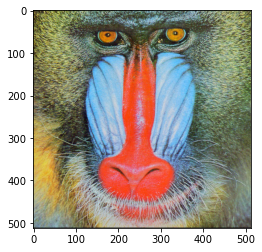

In [4]:
plt.imshow(monkey_image)

In [5]:
print(cat_image.shape)

(1288, 800, 3)


In [6]:
print(monkey_image.shape)

(512, 512, 3)


In [7]:
#crop a certain region and display it

In [8]:
# crop image
cat_image_crop = cat_image[150:650, 160:640, :]
monkey_image_crop = monkey_image[60:350, 60:350, :]

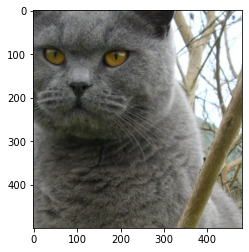

In [9]:
# displaying cropped cat image
plt.imshow(cat_image_crop)

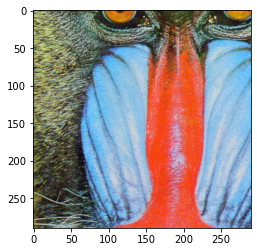

In [10]:
# displaying cropped monkey image
plt.imshow(monkey_image_crop)

In [38]:
#Load an image, find the average colour, and make it brighter or darker, then save the results and display them
cat_image_average = cat_image.mean(axis=0).mean(axis=0)
print(cat_image_average)
monkey_image_average = monkey_image.mean(axis=0).mean(axis=0)
print(monkey_image_average)

[118.13969429 117.19910035 104.03225543]
[137.41073227 128.85677338 113.19013596]


In [32]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [43]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

[118.13969429 117.19910035 104.03225543] 100.00%


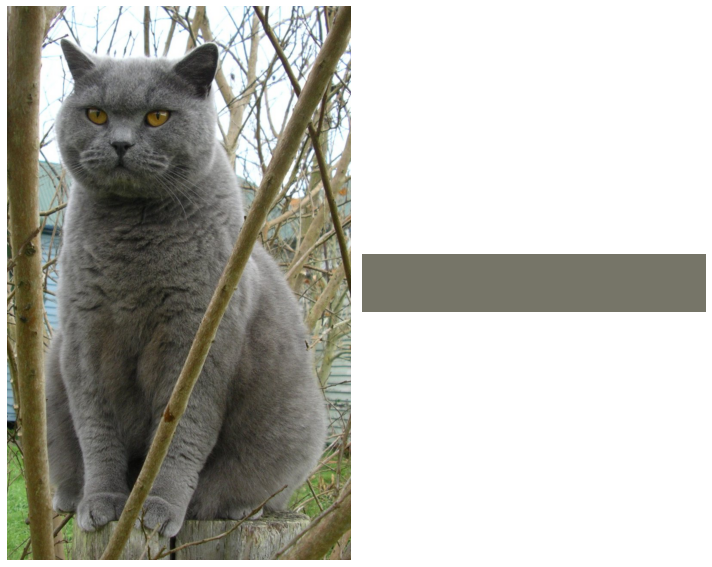

In [56]:
# Load image and convert to a list of pixels
reshape = cat_image.reshape((cat_image.shape[0] * cat_image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=1).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
show_img_compar(cat_image, visualize )

[228.72591502  89.28733698  59.05003305] 12.71%
[146.16899436 186.21441519 214.22854612] 18.46%
[67.66017211 70.11813136 52.67850091] 20.43%
[174.09184721 167.94881769 131.60927117] 21.26%
[112.71374126 122.03728184 100.85002883] 27.15%


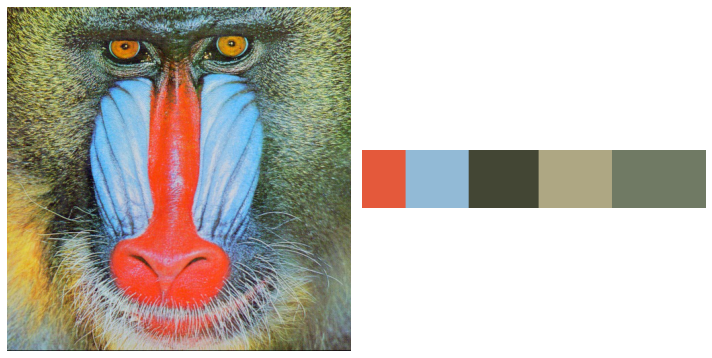

In [58]:
# Load image and convert to a list of pixels
reshape = monkey_image.reshape((monkey_image.shape[0] * monkey_image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
show_img_compar(monkey_image, visualize )